# Padnas example: Movies

In [1]:
%ls data/movies-small

links.csv    movies.csv   ratings.csv  tags.csv


In [2]:
%%bash
cat data/movies-small/movies.csv | wc -l

    9743


In [3]:
%%bash
cat data/movies-small/ratings.csv | wc -l

  100837


In [4]:
%%bash
head -5 data/movies-small/ratings.csv

userId,movieId,rating,timestamp
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815


## Read the Dataset
We will be using three CSV files with the following data:
* ratings.csv
    * `userId`, `movieId`, `rating`, `timestamp`
* tags.csv
    * `userId`, `movieId`, `tag`, `timestamp`
* movies.csv
    * `movieId`, `title`, `genres`


In [5]:
import pandas as pd

movies = pd.read_csv('./data/movies-small/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


movieId                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   
5         6                         Heat (1995)   
6         7                      Sabrina (1995)   
7         8                 Tom and Huck (1995)   
8         9                 Sudden Death (1995)   
9        10                    GoldenEye (1995)   
10       11      American President, The (1995)   
11       12  Dracula: Dead and Loving It (1995)   
12       13                        Balto (1995)   
13       14                        Nixon (1995)   
14       15             Cutthroat Island (1995)   

                                         genres  
0   Adventure|Animation|Children|Comedy|Fantasy  
1                    Adventure|Children|Fantasy  
2                                Comedy|Romance  
3                          Comedy|Drama|Romance  
4                                        Comedy  
5                         Action|Crime|Thriller  
6                                Comedy|Romance  
7                            Adventure|Children  
8                                        Action  
9                     Action|Adventure|Thriller  
10                         Comedy|Drama|Romance  
11                                Comedy|Horror  
12                 Adventure|Animation|Children  
13                                        Drama  
14                     Action|Adventure|Romance

In [6]:
tags = pd.read_csv('./data/movies-small/tags.csv', sep=',')
tags.head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

If we need we can parse date in milliseconds/seconds to a human readable form

In [7]:
import datetime

def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

ratings = pd.read_csv(
        './data/movies-small/ratings.csv',
        sep=',',
        parse_dates=['timestamp'],
        date_parser=dateparse)
ratings.head()


/var/folders/f4/1lqq78l96fl0g_767m0lyysw0000gn/T/ipykernel_96166/1275877171.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ratings = pd.read_csv(


userId  movieId  rating           timestamp
0       1        1     4.0 2000-07-30 21:45:03
1       1        3     4.0 2000-07-30 21:20:47
2       1        6     4.0 2000-07-30 21:37:04
3       1       47     5.0 2000-07-30 22:03:35
4       1       50     5.0 2000-07-30 21:48:51

We don't realy need the date now, let's remove it

In [8]:
del ratings['timestamp']
del tags['timestamp']

## Descriptive Statistics
Let's look how the ratings are distributed!

In [9]:
ratings.describe()

userId        movieId         rating
count  100836.000000  100836.000000  100836.000000
mean      326.127564   19435.295718       3.501557
std       182.618491   35530.987199       1.042529
min         1.000000       1.000000       0.500000
25%       177.000000    1199.000000       3.000000
50%       325.000000    2991.000000       3.500000
75%       477.000000    8122.000000       4.000000
max       610.000000  193609.000000       5.000000

In [10]:
ratings.mode()

userId  movieId  rating
0     414      356     4.0

In [11]:
ratings.corr()

userId   movieId    rating
userId   1.000000  0.006773 -0.049348
movieId  0.006773  1.000000 -0.004061
rating  -0.049348 -0.004061  1.000000

In [12]:
filter_2 = ratings.loc[ratings['rating'] > 0]

In [13]:
filter_2.groupby("movieId").mean()

userId    rating
movieId                      
1        306.530233  3.920930
2        329.554545  3.431818
3        283.596154  3.259615
4        219.857143  2.357143
5        299.571429  3.071429
...             ...       ...
193581   184.000000  4.000000
193583   184.000000  3.500000
193585   184.000000  3.500000
193587   184.000000  3.500000
193609   331.000000  4.000000

[9724 rows x 2 columns]

## Data Cleaning
### Handling Missing Data

In [14]:
movies.shape

(9742, 3)

Is there any row Null?

In [15]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Nice, so we do not have to worry about this!

In [16]:
ratings.shape

(100836, 3)

In [17]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

Nice, so we do not have to worry about this!

In [18]:
tags.shape

(3683, 3)

In [19]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

We will have to deal with NaN values in this data set

In [20]:
tags = tags.dropna()

Check again if there is any row null

In [21]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

Thats nice! Nonetheless, notice that the number of lines have reduces

In [22]:
tags.shape

(3673, 3)

## Data Visualization

In [23]:
%%capture
# capture is used to suppress output of package installation :)
%pip install matplotlib
import matplotlib.pylab as plt
%matplotlib inline

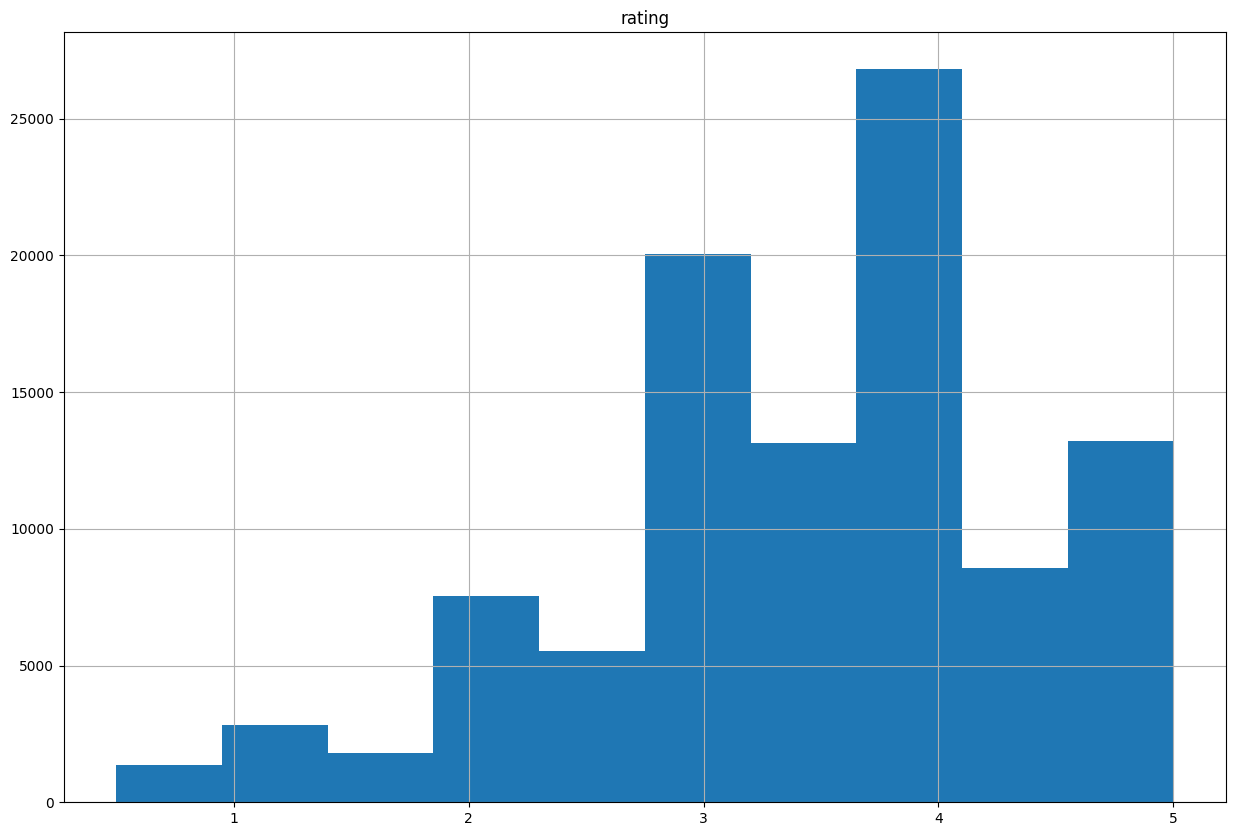

In [24]:
ratings.hist(column='rating', figsize=(15,10),bins=10)
plt.show()

## Getting information from columns

In [25]:
tags['tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [26]:
movies[['title','genres']].head()

title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [27]:
ratings[-10:]

userId  movieId  rating
100826     610   162350     3.5
100827     610   163937     3.5
100828     610   163981     3.5
100829     610   164179     5.0
100830     610   166528     4.0
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0

In [28]:
ratings.tail(10)

userId  movieId  rating
100826     610   162350     3.5
100827     610   163937     3.5
100828     610   163981     3.5
100829     610   164179     5.0
100830     610   166528     4.0
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0

<Axes: xlabel='tag'>

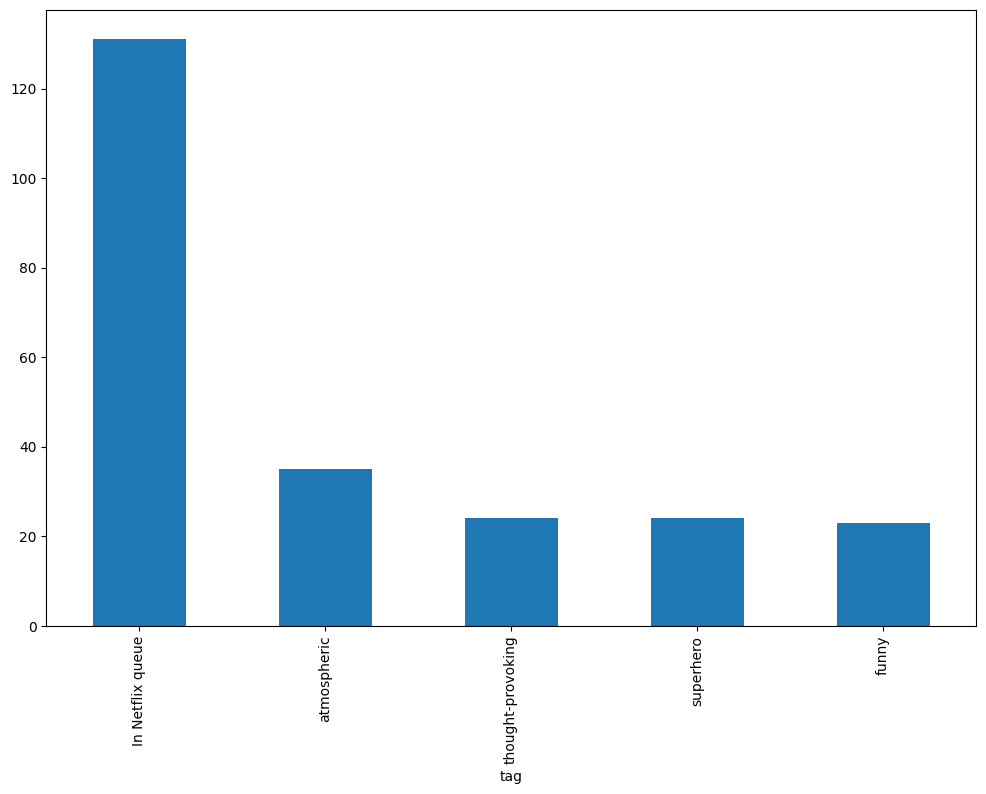

In [29]:
tag_counts = tags['tag'].value_counts()
tag_counts.head().plot(kind='bar', figsize=(12,8))

<Axes: xlabel='tag'>

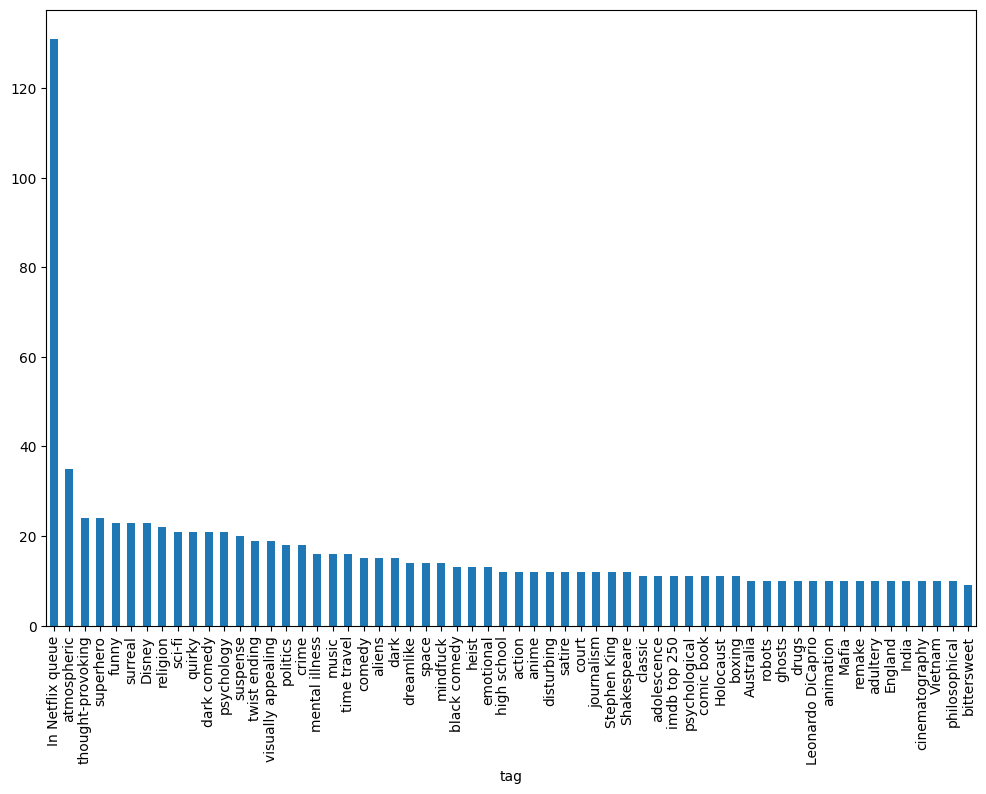

In [30]:
tag_counts.head(60).plot(kind='bar', figsize=(12,8))

<Axes: xlabel='tag'>

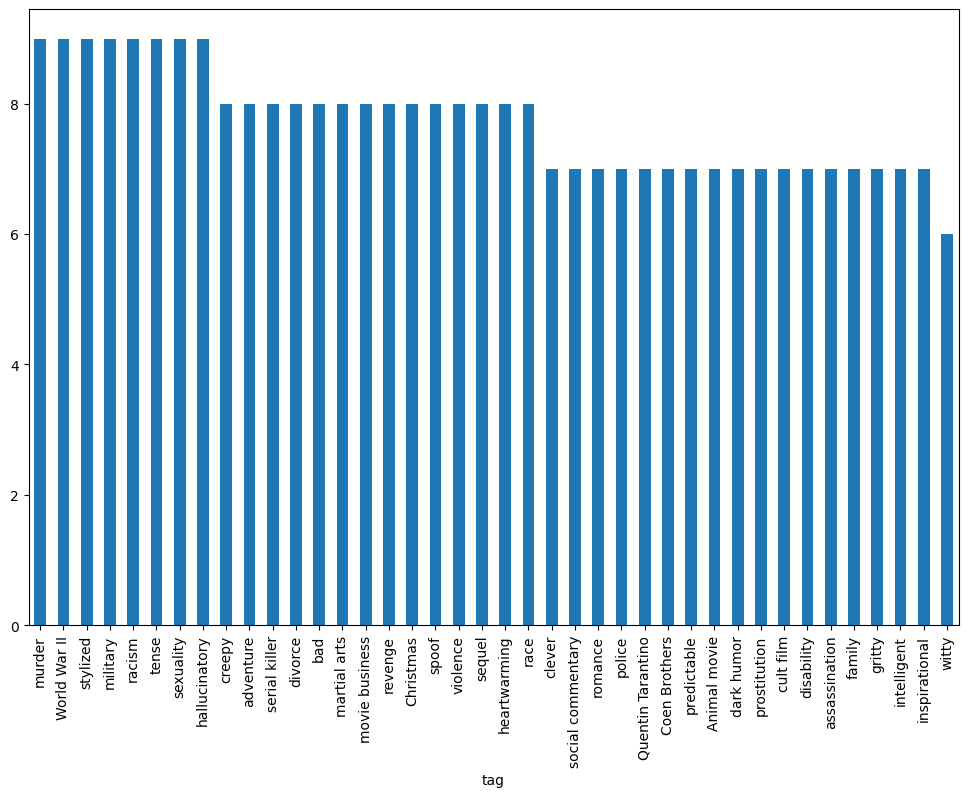

In [31]:
tag_counts[60:100].plot(kind='bar', figsize=(12,8))

## Filters for Selecting Rows

In [32]:
is_highly_rated = ratings['rating'] >= 4.0
ratings[is_highly_rated].head()

userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

In [33]:
is_animation = movies['genres'].str.contains('Animation')
movies[is_animation].head(15)

movieId                                   title  \
0          1                        Toy Story (1995)   
12        13                            Balto (1995)   
44        48                       Pocahontas (1995)   
205      239                   Goofy Movie, A (1995)   
272      313               Swan Princess, The (1994)   
322      364                   Lion King, The (1994)   
483      551  Nightmare Before Christmas, The (1993)   
488      558                  Pagemaster, The (1994)   
506      588                          Aladdin (1992)   
511      594  Snow White and the Seven Dwarfs (1937)   
512      595             Beauty and the Beast (1991)   
513      596                        Pinocchio (1940)   
522      610                      Heavy Metal (1981)   
527      616                  Aristocats, The (1970)   
534      631          All Dogs Go to Heaven 2 (1996)   

                                                genres  
0          Adventure|Animation|Children|Comedy|Fantasy  
12                        Adventure|Animation|Children  
44            Animation|Children|Drama|Musical|Romance  
205                  Animation|Children|Comedy|Romance  
272                                 Animation|Children  
322    Adventure|Animation|Children|Drama|Musical|IMAX  
483                 Animation|Children|Fantasy|Musical  
488        Action|Adventure|Animation|Children|Fantasy  
506        Adventure|Animation|Children|Comedy|Musical  
511           Animation|Children|Drama|Fantasy|Musical  
512    Animation|Children|Fantasy|Musical|Romance|IMAX  
513                 Animation|Children|Fantasy|Musical  
522           Action|Adventure|Animation|Horror|Sci-Fi  
527                                 Animation|Children  
534  Adventure|Animation|Children|Fantasy|Musical|R...

In [34]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

movieId
rating         
0.5        1370
1.0        2811
1.5        1791
2.0        7551
2.5        5550
3.0       20047
3.5       13136
4.0       26818
4.5        8551
5.0       13211

## Group By and Aggregate

In [35]:
# We are not in  terested in the user that voted for it
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

rating
movieId          
1        3.920930
2        3.431818
3        3.259615
4        2.357143
5        3.071429

## Solving problems with Pandas

Required: Get the movies that are in average the best rated movies

Solution 1: Sort the list in descending order and get the first rows

In [36]:
sorted_average_rating=average_rating.sort_values(by="rating",ascending=False)
sorted_average_rating.head()

rating
movieId        
88448       5.0
100556      5.0
143031      5.0
143511      5.0
143559      5.0

Solution 2: Do not sort the list but intead ask where we have that the rating score is `5.0`

In [37]:
average_rating.loc[average_rating.rating==5.0].head()

rating
movieId        
53          5.0
99          5.0
148         5.0
467         5.0
495         5.0

But since we do not understand to what this Id movie is related, we would like to see intead the name of the movie.

To do that, we need to see in the `movies` DataFrame

In [38]:
id_movie=average_rating.loc[average_rating.rating==5.0].index
movies.loc[movies.movieId.isin(id_movie)].head()

movieId                                              title  \
48        53                                    Lamerica (1994)   
87        99               Heidi Fleiss: Hollywood Madam (1995)   
121      148                   Awfully Big Adventure, An (1995)   
405      467                             Live Nude Girls (1995)   
432      495  In the Realm of the Senses (Ai no corrida) (1976)   

              genres  
48   Adventure|Drama  
87       Documentary  
121            Drama  
405           Comedy  
432            Drama

## Merge Dataframes

In [39]:
tags.head()

userId  movieId              tag
0       2    60756            funny
1       2    60756  Highly quotable
2       2    60756     will ferrell
3       2    89774     Boxing story
4       2    89774              MMA

In [40]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [41]:
t = pd.merge(movies,tags, on='movieId', how='inner')
t.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        2    Jumanji (1995)                   Adventure|Children|Fantasy   
4        2    Jumanji (1995)                   Adventure|Children|Fantasy   

   userId               tag  
0     336             pixar  
1     474             pixar  
2     567               fun  
3      62           fantasy  
4      62  magic board game

## Combine aggreagation, merging, and filters to get useful analytics

In [42]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

movieId    rating
0        1  3.920930
1        2  3.431818
2        3  3.259615
3        4  2.357143
4        5  3.071429

In [43]:
box_office = pd.merge(movies,avg_ratings, on='movieId', how='inner')
box_office.tail()

movieId                                      title  \
9719   193581  Black Butler: Book of the Atlantic (2017)   
9720   193583               No Game No Life: Zero (2017)   
9721   193585                               Flint (2017)   
9722   193587        Bungo Stray Dogs: Dead Apple (2018)   
9723   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  rating  
9719  Action|Animation|Comedy|Fantasy     4.0  
9720         Animation|Comedy|Fantasy     3.5  
9721                            Drama     3.5  
9722                 Action|Animation     3.5  
9723                           Comedy     4.0

In [44]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated].tail()

movieId                                      title  \
9713   191005                             Gintama (2017)   
9716   193571                        Silver Spoon (2014)   
9717   193573    Love Live! The School Idol Movie (2015)   
9719   193581  Black Butler: Book of the Atlantic (2017)   
9723   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  rating  
9713   Action|Adventure|Comedy|Sci-Fi     4.5  
9716                     Comedy|Drama     4.0  
9717                        Animation     4.0  
9719  Action|Animation|Comedy|Fantasy     4.0  
9723                           Comedy     4.0

In [45]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy].head()

movieId                               title  \
0        1                    Toy Story (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
6        7                      Sabrina (1995)   

                                        genres    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  3.920930  
2                               Comedy|Romance  3.259615  
3                         Comedy|Drama|Romance  2.357143  
4                                       Comedy  3.071429  
6                               Comedy|Romance  3.185185

In [46]:
box_office[is_comedy & is_highly_rated].head()

movieId                                       title  \
52        58           Postman, The (Postino, Il) (1994)   
94       106  Nobody Loves Me (Keiner liebt mich) (1994)   
148      176                   Living in Oblivion (1995)   
158      187                           Party Girl (1995)   
257      296                         Pulp Fiction (1994)   

                          genres    rating  
52          Comedy|Drama|Romance  4.027027  
94                  Comedy|Drama  4.000000  
148                       Comedy  4.307692  
158                       Comedy  4.125000  
257  Comedy|Crime|Drama|Thriller  4.197068

## Vectorized String Operations

In [47]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [48]:
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres.head(10)

0          1         2       3        4     5     6     7     8  \
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None  None   
1  Adventure   Children   Fantasy    None     None  None  None  None  None   
2     Comedy    Romance      None    None     None  None  None  None  None   
3     Comedy      Drama   Romance    None     None  None  None  None  None   
4     Comedy       None      None    None     None  None  None  None  None   
5     Action      Crime  Thriller    None     None  None  None  None  None   
6     Comedy    Romance      None    None     None  None  None  None  None   
7  Adventure   Children      None    None     None  None  None  None  None   
8     Action       None      None    None     None  None  None  None  None   
9     Action  Adventure  Thriller    None     None  None  None  None  None   

      9  
0  None  
1  None  
2  None  
3  None  
4  None  
5  None  
6  None  
7  None  
8  None  
9  None

Add a new column for comedy genre flag

In [49]:
movie_genres['IsComedy'] = movies['genres'].str.contains('Comedy')
movie_genres.head()

0          1         2       3        4     5     6     7     8  \
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None  None   
1  Adventure   Children   Fantasy    None     None  None  None  None  None   
2     Comedy    Romance      None    None     None  None  None  None  None   
3     Comedy      Drama   Romance    None     None  None  None  None  None   
4     Comedy       None      None    None     None  None  None  None  None   

      9  IsComedy  
0  None      True  
1  None     False  
2  None      True  
3  None      True  
4  None      True

Extract year from title e.g. (1995)

In [50]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

## Parsing Timestamps
Timestamps are common in sensor data or other time series datasets. Let's revisit the `tags.csv` dataset and read the timestamps!

In [51]:
tags = pd.read_csv('./data/movies-small/tags.csv', sep=',')
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

Unix time / POSIX time / epoch time records time in seconds  since midnight Coordinated Universal Time (UTC) of January 1,  1970

In [52]:
tags.head(5)

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [53]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
tags['parsed_time'].dtype

dtype('<M8[ns]')

Data Type `datetime64[ns]` maps to either `M8[ns]` depending on the hardware

In [54]:
tags.head(2)

userId  movieId              tag   timestamp         parsed_time
0       2    60756            funny  1445714994 2015-10-24 19:29:54
1       2    60756  Highly quotable  1445714996 2015-10-24 19:29:56

### Selecting rows based on timestamps

In [55]:
greater_than_t = tags['parsed_time'] > '2015-02-01'
selected_rows = tags[greater_than_t]
print(tags.shape, selected_rows.shape)

(3683, 5) (1710, 5)


Sorting the table using the timestamps

In [56]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

userId  movieId                       tag   timestamp  \
1756     474     3181               Shakespeare  1137179352   
2212     474     6912  Rita Hayworth can dance!  1137179371   
1636     474     2494                   Hungary  1137179426   
1635     474     2494                 Holocaust  1137179426   
1497     474     1836         No DVD at Netflix  1137179444   
1961     474     4969          In Netflix queue  1137179563   
2409     474    26242          In Netflix queue  1137179570   
2413     474    27741          In Netflix queue  1137179587   
2231     474     7025          In Netflix queue  1137179593   
2485     474    41997          In Netflix queue  1137179603   

             parsed_time  
1756 2006-01-13 19:09:12  
2212 2006-01-13 19:09:31  
1636 2006-01-13 19:10:26  
1635 2006-01-13 19:10:26  
1497 2006-01-13 19:10:44  
1961 2006-01-13 19:12:43  
2409 2006-01-13 19:12:50  
2413 2006-01-13 19:13:07  
2231 2006-01-13 19:13:13  
2485 2006-01-13 19:13:23

Average Movie Ratings over Time

In [57]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

movieId  rating
9719   193581     4.0
9720   193583     3.5
9721   193585     3.5
9722   193587     3.5
9723   193609     4.0

In [58]:
joined = pd.merge(movies,average_rating, on='movieId', how='inner')
joined.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  3.920930  
1                   Adventure|Children|Fantasy  1995  3.431818  
2                               Comedy|Romance  1995  3.259615  
3                         Comedy|Drama|Romance  1995  2.357143  
4                                       Comedy  1995  3.071429

In [59]:
joined.corr(numeric_only=True)

movieId    rating
movieId  1.000000  0.027841
rating   0.027841  1.000000

In [60]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average.head(10)

year    rating
0  1902  3.500000
1  1903  2.500000
2  1908  4.000000
3  1915  2.000000
4  1916  3.562500
5  1917  4.500000
6  1919  2.000000
7  1920  3.678571
8  1921  4.100000
9  1922  3.531250

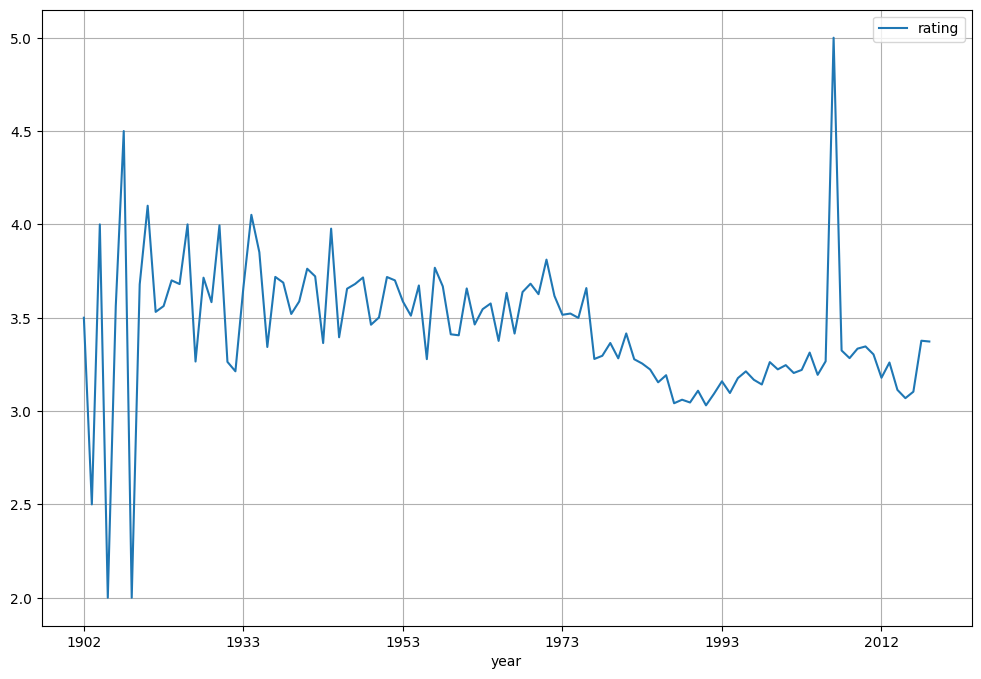

In [61]:
yearly_average.plot(x='year', y='rating', figsize=(12,8), grid=True)
plt.show()